In [33]:
import pandas as pd
import numpy as np
# loading the required libraries
import os
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import statsmodels.formula.api as smf # linear regression --> Rsquared
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
random_state =  0

In [34]:
df = pd.read_csv('netsparker.txt')

In [35]:
df.head()

,"192.168.4.164 - - [22/Dec/2016:15:19:05 +0300] GET /DVWA/ HTTP/1.1"" 200 2020 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML","like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
0,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
1,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
2,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
3,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
4,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""


In [36]:
df.columns

Index([u'192.168.4.164 - - [22/Dec/2016:15:19:05 +0300] GET /DVWA/ HTTP/1.1" 200 2020 "-" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML', u' like Gecko) Chrome/41.0.2272.16 Safari/537.36""'], dtype='object')

In [37]:
df.shape

(7313, 2)

In [38]:
df.describe

<bound method DataFrame.describe of      192.168.4.164 - - [22/Dec/2016:15:19:05 +0300] GET /DVWA/ HTTP/1.1" 200 2020 "-" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML  \
0     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...                                                                                                
1     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...                                                                                                
2     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...                                                                                                
3     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...                                                                                                
4     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...                                                                                                
5     192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]

## DATA CLEANING
## Split IP addresses

In [39]:
## renaming the columns for better readings
df.rename(columns={'192.168.4.164 - - [22/Dec/2016:15:19:05 +0300] GET /DVWA/ HTTP/1.1" 200 2020 "-" "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML':'Requests'}, 
                 inplace=True)

In [40]:
df.head()

,Requests,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
0,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
1,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
2,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
3,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""
4,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"like Gecko) Chrome/41.0.2272.16 Safari/537.36"""""


In [41]:
import pandas as pd
import numpy as np
import socket
import json
# Split IP addresses
df[['IP','header']] = df["Requests"].str.split(" - - \[", 1, expand=True)
# Remove slash
df['IP'] = df['IP'].str.replace("Row\(\('","",n=1)

## Split dates and times
<p>We now need to convert the date column from string to a “Date time” object, via the Pandas to_datetime() method</p>

In [42]:
# Split Date & Time
df[['Date_Time', 'header']] = df['Requests'].str.split("\] ", 1,
        expand=True)
df['Date_Time'] = df['Date_Time'].str.replace(':.*', '')

# Convert the Date_Time column from string to datetime format
df['Date'] = pd.to_datetime(df['Date_Time'], errors='coerce',
                            infer_datetime_format=True)

# Remove Time column, for clarity's sake
df = df.drop(['Date_Time'], axis=1)

# Check that the Date column has been converted to a time series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 5 columns):
Requests                                            7313 non-null object
 like Gecko) Chrome/41.0.2272.16 Safari/537.36""    7313 non-null object
IP                                                  7313 non-null object
header                                              7313 non-null object
Date                                                0 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 171.4+ KB


In [43]:
df[['Domain','header']] = df["Requests"].str.split(" \"", 1, expand=True)

## Split methods (Get, Post etc…)

In [44]:
df[['Method','header']] = df["Requests"].str.split(" ", 1, expand=True)

## Split URLs

In [45]:
df[['url','header']] = df["Requests"].str.split(" ", 1, expand=True)
# Remove slash (/) at the start of each URL
df['url'] = df['url'].str.replace('/','',n=1)

## Split HTTP Protocols

In [46]:
df[['httpProto','header']] = df["Requests"].str.split("\" ", 1, expand=True)

## Split status codes

In [47]:
df[['httpCode','header']] = df["header"].str.split(" ", 1, expand=True)

## Split ‘time taken’

In [48]:
df[['timeTaken','header']] = df["header"].str.split(" ", 1, expand=True)

# Split User Agents

In [49]:
df[['userAgent','header']] = df["Requests"].str.split("\" ", 1, expand=True)

## Split referral URLs

In [50]:
df[['urlRef','header']] = df["header"].str.split(" ", 1, expand=True)
df['urlRef'] = df['urlRef'].str.replace('\"', '')

## Reorder columns

In [51]:
df = df[['IP','Date','Domain','Method','url','httpProto','timeTaken','urlRef','userAgent','header']]
df.rename(columns={"Requests": "redirURL"}, inplace=True)

In [52]:
df

,IP,Date,Domain,Method,url,httpProto,timeTaken,urlRef,userAgent,header
0,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,263,200,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"263 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
1,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
2,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
3,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
4,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
5,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
6,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
7,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
8,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."
9,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A..."


## Create categorical columns
## Create an HTTP codes class column

In [53]:
df['httpCodeClass'] = pd.np.where(df.urlRef.str.contains("^1.*"), 'Info (1XX)',
  pd.np.where(df.urlRef.str.contains("^2.*"), 'Success (2XX)',
    pd.np.where(df.urlRef.str.contains("^3.*"), 'Redirects (3XX)',
      pd.np.where(df.urlRef.str.contains("^4.*"), 'Client errors (4XX)', 'Server errors (5XX)'))))

## Create a search engine bots category column

In [54]:
df['SEBotClass'] = pd.np.where(df.userAgent.str.contains("YandexBot"), "YandexBot",
  pd.np.where(df.userAgent.str.contains("bingbot"), "BingBot",
    pd.np.where(df.userAgent.str.contains("DuckDuckBot"), "DuckDuckGo",
      pd.np.where(df.userAgent.str.contains("Baiduspider"), "Baidu",
        pd.np.where(df.userAgent.str.contains("Googlebot/2.1"), "GoogleBot", "Else")))))

In [55]:
df

,IP,Date,Domain,Method,url,httpProto,timeTaken,urlRef,userAgent,header,httpCodeClass,SEBotClass
0,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,263,200,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"263 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Success (2XX),Else
1,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
2,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
3,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
4,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
5,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
6,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
7,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
8,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
9,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else


Text(0.5,0,'HTTP methods')

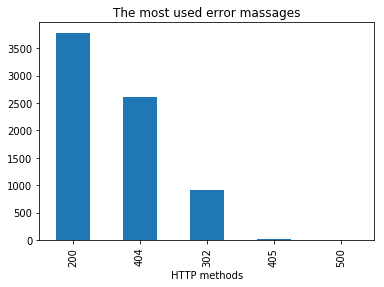

In [70]:
df['urlRef'].value_counts()[:20].plot(kind='bar')
plt.title('The most used error massages')
plt.xlabel('HTTP methods')

Text(0.5,0,'CodeClass')

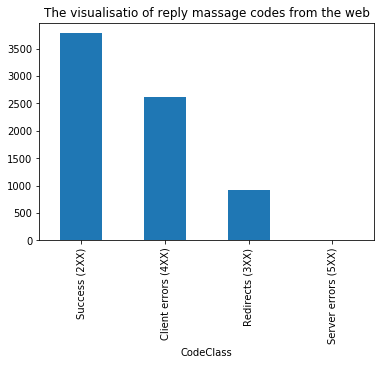

In [57]:
df['httpCodeClass'].value_counts()[:20].plot(kind='bar')
plt.title('The visualisatio of reply massage codes from the web')
plt.xlabel('CodeClass')

## MODEL BUILDING
<p>Clustering Analysis</p>
<p>Using Kmeans Clustering for analysis</p>

<p>Elbow Method to find the Optimal number of Clusters,With k-means, it can be challenging finding the optimum number of clusters so we will apply the elbow method to help us determine the number of clusters to use</p>

In [58]:
df.head(5)

,IP,Date,Domain,Method,url,httpProto,timeTaken,urlRef,userAgent,header,httpCodeClass,SEBotClass
0,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,263,200,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"263 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Success (2XX),Else
1,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
2,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
3,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else
4,192.168.4.164,NaT,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,192.168.4.164,192.168.4.164,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,139,404,192.168.4.164 - - [22/Dec/2016:15:19:06 +0300]...,"139 ""-"" ""Mozilla/5.0 (Windows NT 6.3; WOW64) A...",Client errors (4XX),Else


In [60]:
## dropping unneccessary columns
df = df.drop(['Domain','httpProto','url','Method','IP','url','httpProto','userAgent','header','httpCodeClass','SEBotClass'],axis = 1)
df.head(2)

,Date,timeTaken,urlRef
0,NaT,263,200
1,NaT,139,404


In [61]:
# converting these columns to numeric because i want it to appear in my corr matrix,i'll convert it back after
df['Date'] = pd.to_numeric(df['Date'], errors='ignore')

In [62]:
df['timeTaken'] = pd.to_numeric(df['timeTaken'], errors='ignore')

In [63]:
df['urlRef'] = pd.to_numeric(df['urlRef'], errors='ignore')

In [66]:
df.head(5)

,Date,timeTaken,urlRef
0,-9223372036854775808,263,200
1,-9223372036854775808,139,404
2,-9223372036854775808,139,404
3,-9223372036854775808,139,404
4,-9223372036854775808,139,404


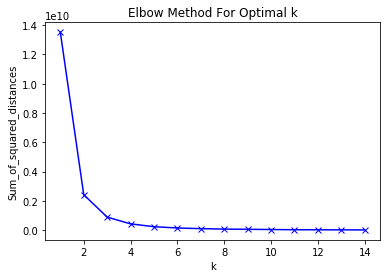

In [67]:
# elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Here  taking the value k as k=3 or 2

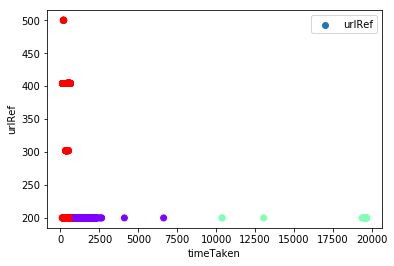

In [68]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df)

# clusering result
clusters_3 = df.copy()
clusters_3['clusters_pred'] = kmeans.fit_predict(df)

# plotting
plt.scatter(clusters_3['timeTaken'],clusters_3['urlRef'],c = clusters_3['clusters_pred'],cmap='rainbow')
plt.xlabel('timeTaken')
plt.ylabel('urlRef')
plt.legend()
plt.show()

In [69]:
## checking the accurrency of the kmeans model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['urlRef'],kmeans.labels_))
print(classification_report(df['urlRef'],kmeans.labels_))

[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [2624   34 1125    0    0    0    0    0]
 [   0    0  910    0    0    0    0    0]
 [   0    0 2602    0    0    0    0    0]
 [   0    0   12    0    0    0    0    0]
 [   0    0    6    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
         200       0.00      0.00      0.00      3783
         302       0.00      0.00      0.00       910
         404       0.00      0.00      0.00      2602
         405       0.00      0.00      0.00        12
         500       0.00      0.00      0.00         6

   micro avg       0.00      0.00      0.00      7313
   macro avg       0.00      0.00      0.00      7313
weighted avg       0.00      0.00      0.00      7313



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda2\lib\sit